Part 1: Defining an oscillatory function

In [54]:
###Importing all the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def sin(x):
  return np.sin(x)

def oscillatory(t, a1, f1, p1, a2, f2, p2):
    return a1 * sin(f1 * t + p1) + a2 * sin(f2 * t + p2)

t: Time at which the tide height is being measured.;
a1: Amplitude of the first wave;
f1: Frequency of the first wave;
p1: Phase shift of the first wave;
a2: Amplitude of the second wave;
f2: Frequency of the second wave;
p2: Phase shift of the second wave;
oscillatory function: returns the height of the tide as a function of time


Part 2:  Fitting the oscillatory function to the data

In [56]:
path='/content/ASTR19_S22_group_project_data.txt'
t=[]
h=[]

f=open(path, 'r')
data=f.readlines()
f.close()
without_first_3=data[3:]
for line in without_first_3:
    day,t_str,height=line.split()
    hour, minute=map(int,t_str.split(':'))
    hours=int(day) * 24 + hour + minute / 60.0
    t.append(hours)
    h.append(float(height))

t = np.array(t)
h = np.array(h)


t: List with all time readings;
h: List with all heigt readigs;
without_first_3: .txt file contents without first 3 lines to remove comments;
hours: day, time and minute converted to hours

In [57]:
init = [1, 2 * np.pi / 12.42, 0, 1, 2 * np.pi / 24, 0]
params, _ = curve_fit(oscillatory, t, h, p0=init, sigma=np.full(len(h), 0.25))

init: Initial guess of model parameters;
params: the fitted curve

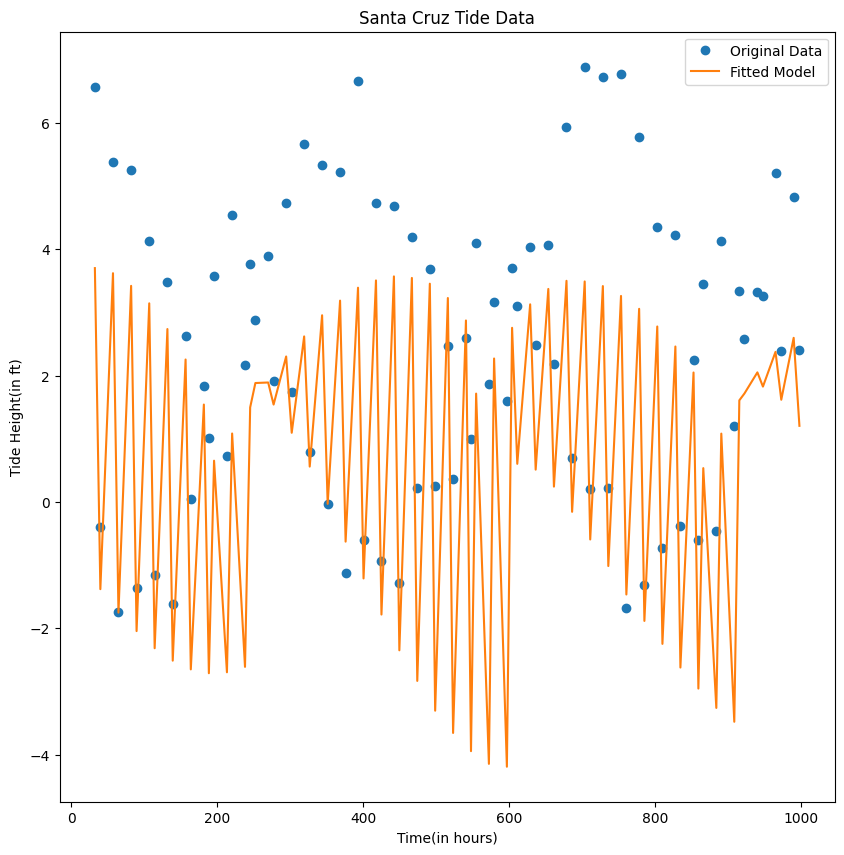

In [58]:
plt.figure(figsize=(10, 10))
plt.plot(t,h, 'o', label='Original Data')
plt.plot(t,oscillatory(t,*params), label='Fitted Model')
plt.title('Santa Cruz Tide Data')
plt.xlabel('Time(in hours)')
plt.ylabel('Tide Height(in ft)')
plt.legend()
plt.savefig('fitted.pdf')
plt.show()

Part 3: Plotting the residuals

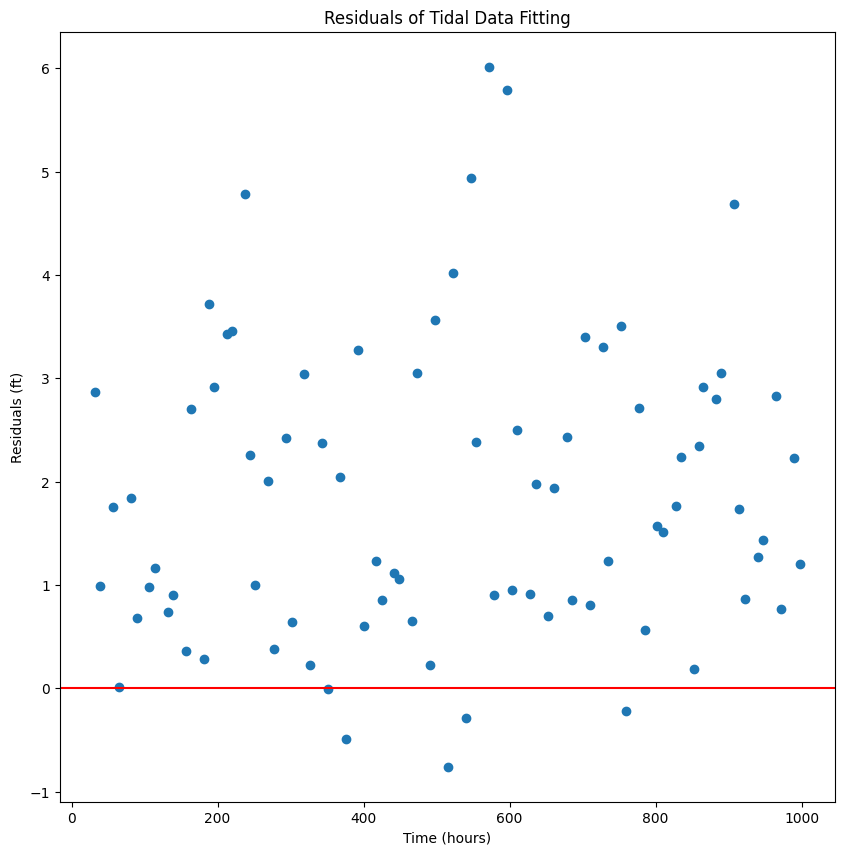

In [59]:
cleaned = h - oscillatory(t, *params)
plt.figure(figsize=(10, 10))
plt.scatter(t,cleaned)
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Residuals of Tidal Data Fitting')
plt.xlabel('Time (hours)')
plt.ylabel('Residuals (ft)')
plt.savefig('cleaned.pdf')
plt.show()

cleaned: Data with best fit function subtracted

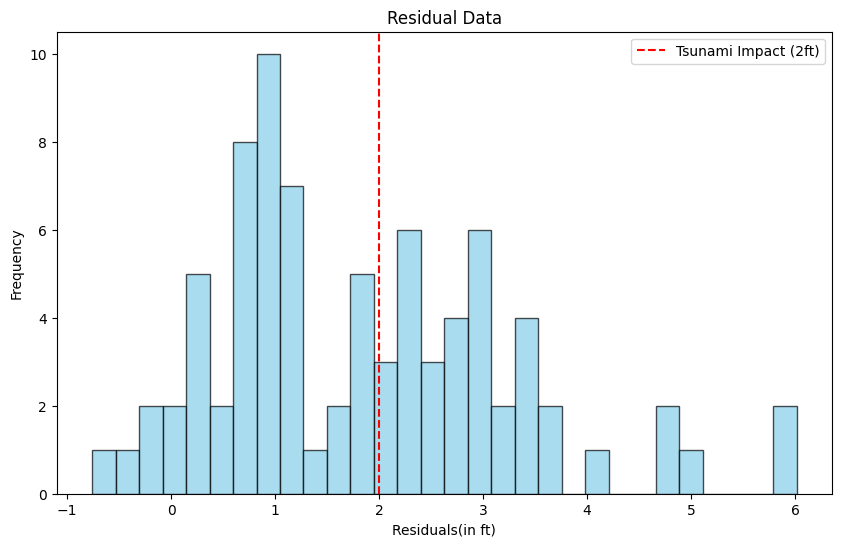

In [60]:
std_dev_cleaned = np.std(cleaned)
tsunami = 2.0  # 2ft increase due to tsunami
plt.figure(figsize=(10, 6))
plt.hist(cleaned, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=tsunami, color='red', linestyle='--', label='Tsunami Impact (2ft)')
plt.xlabel('Residuals(in ft)')
plt.ylabel('Frequency')
plt.title('Residual Data')
plt.legend()
plt.savefig('tide_histo.pdf')
plt.show()

Part 4: Calculating deviation

In [61]:
print("Standard Deviation of Residuals:", std_dev_cleaned)
print()
print("tandard Deviations of Tsunamis from the model:", tsunami / std_dev_cleaned)

Standard Deviation of Residuals: 1.419302718992169

tandard Deviations of Tsunamis from the model: 1.4091426538097367
